In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

Shape of Training Image Data: (60000, 28, 28, 1)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28, 1)
Shape of Test Class Data: (10000,)


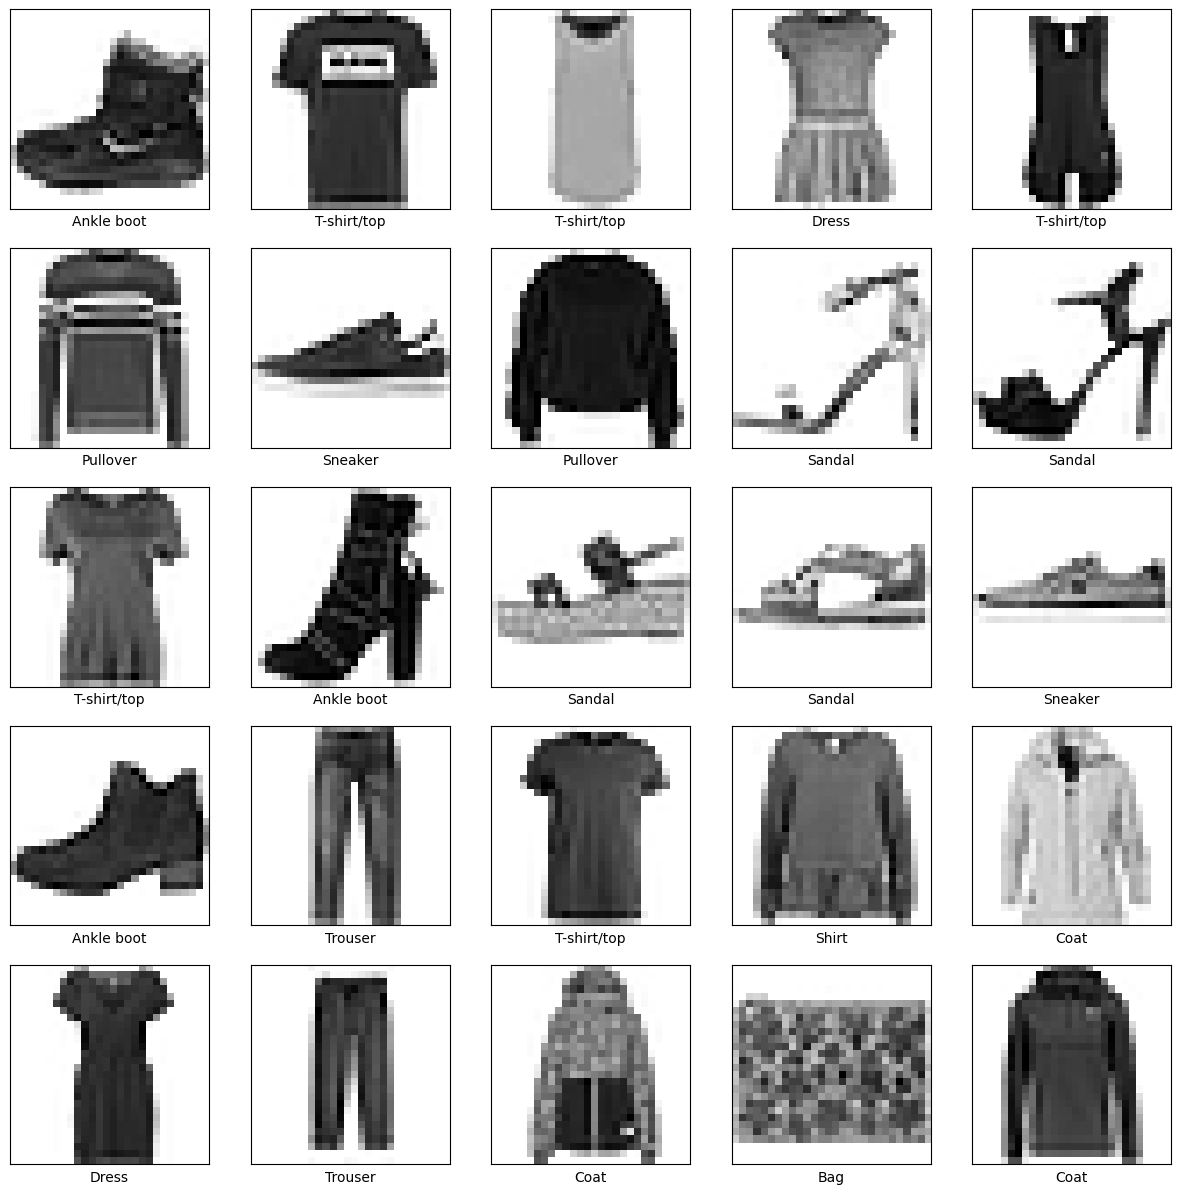

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

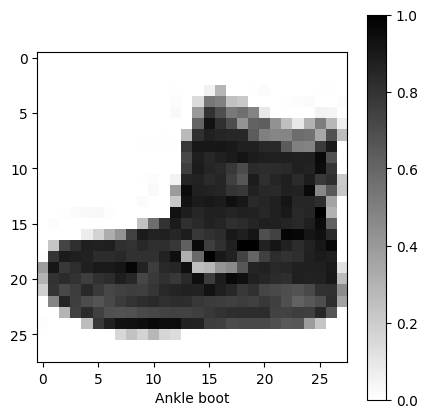

In [ ]:

index = 0
plt.figure(figsize=(5,5))
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[index]])
plt.colorbar()
        
plt.show()

In [ ]:

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters=32,  
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', 
        input_shape=(28, 28, 1) 
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)


model.add(
    tf.keras.layers.Flatten()
)
model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=10, 
        activation='softmax' 
    )
)


model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

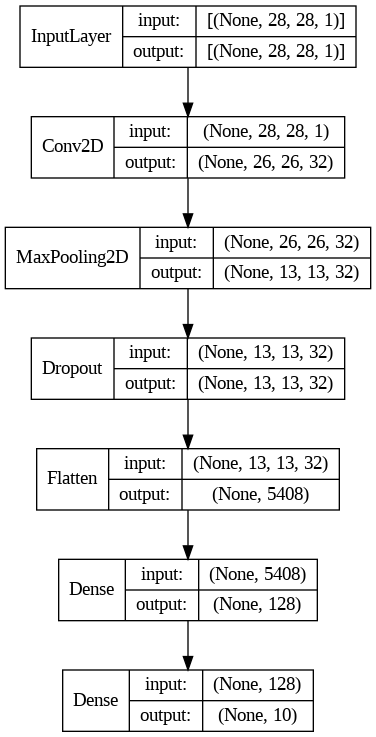

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


history = model.fit(
    
      
      x_train, y_train,
                    
      
      batch_size=256, 

      
      epochs=10, 

       
      validation_split=0.2, 

      verbose=1) 

Epoch 1/10
188/188 [==============================] - 11s 8ms/step - loss: 0.5273 - accuracy: 0.8193 - val_loss: 0.3637 - val_accuracy: 0.8742
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 0.3468 - accuracy: 0.8778 - val_loss: 0.3289 - val_accuracy: 0.8832
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 0.3060 - accuracy: 0.8925 - val_loss: 0.3046 - val_accuracy: 0.8906
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2799 - accuracy: 0.8996 - val_loss: 0.2851 - val_accuracy: 0.8992
Epoch 5/10
188/188 [==============================] - 1s 8ms/step - loss: 0.2595 - accuracy: 0.9064 - val_loss: 0.2860 - val_accuracy: 0.8968
Epoch 6/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2438 - accuracy: 0.9125 - val_loss: 0.2675 - val_accuracy: 0.9047
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2292 - accuracy: 0.9164 - val_loss: 0.2589 - val_accuracy: 0.9081
Epoch

In [ ]:
predicted_classes = model.predict(x_test)

y_pred = [np.argmax(predicted_classes[i]) for i in range(len(predicted_classes))]
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.91      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.80      0.91      0.85      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.88      0.83      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.82      0.66      0.73      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



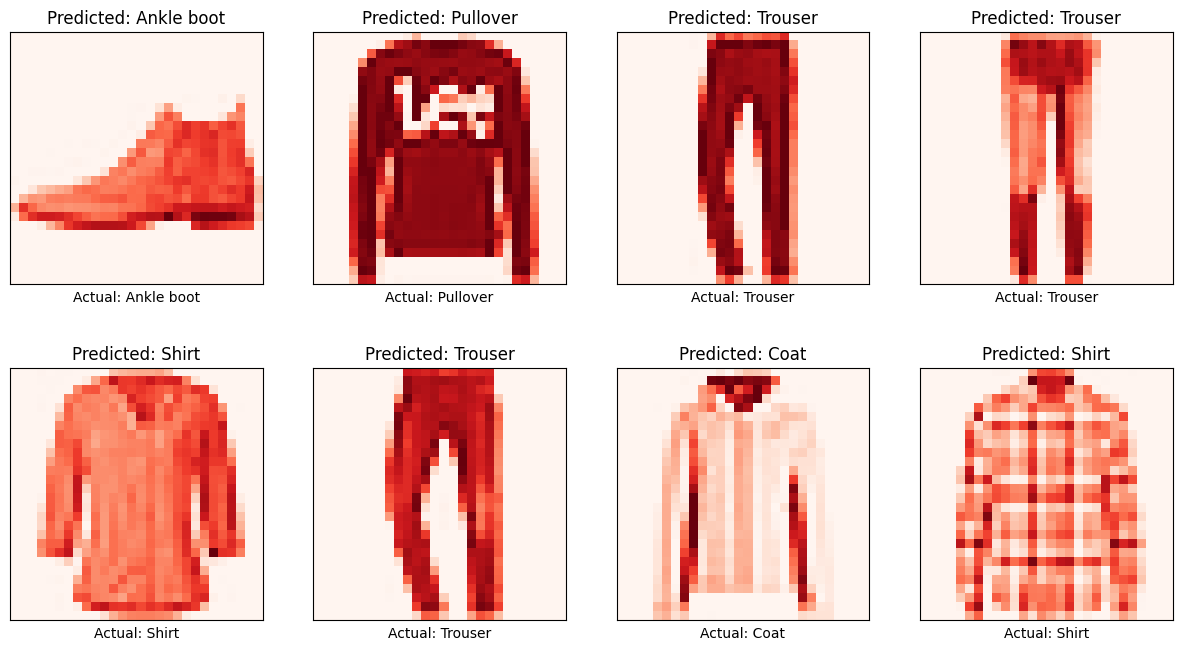

In [ ]:
correct = np.nonzero(y_pred==y_test)[0]

plt.figure(figsize=(15, 8))
for j, correct in enumerate(correct[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[correct].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred[correct]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[correct]]))